In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv'

1) UNIVARIATE ANALYSIS

In [ ]:
def univariate_analysis(col):
    data = df[col].dropna()
    print(f"\n--- {col} ---")
    print(f"Count: {data.count()}")
    print(f"Missing: {df[col].isna().sum()}")
    print(f"Mean: {data.mean():.2f}")
    print(f"Median: {data.median():.2f}")
    print(f"Mode: {data.mode().values}")
    print(f"Min: {data.min()}")
    print(f"Max: {data.max()}")
    print(f"Std Dev: {data.std():.2f}")
    print(f"Variance: {data.var():.2f}")
    print(f"Skewness: {data.skew():.2f}")
    print(f"Kurtosis: {data.kurt():.2f}")
for col in ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'extra']:
     univariate_analysis(col)

2) VISULAIZATION

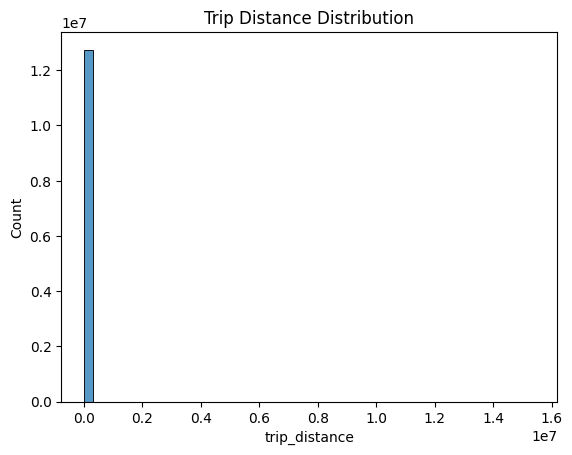

In [13]:
#histogram
sns.histplot(df['trip_distance'], bins=50, kde=False)
plt.title('Trip Distance Distribution')
plt.show()

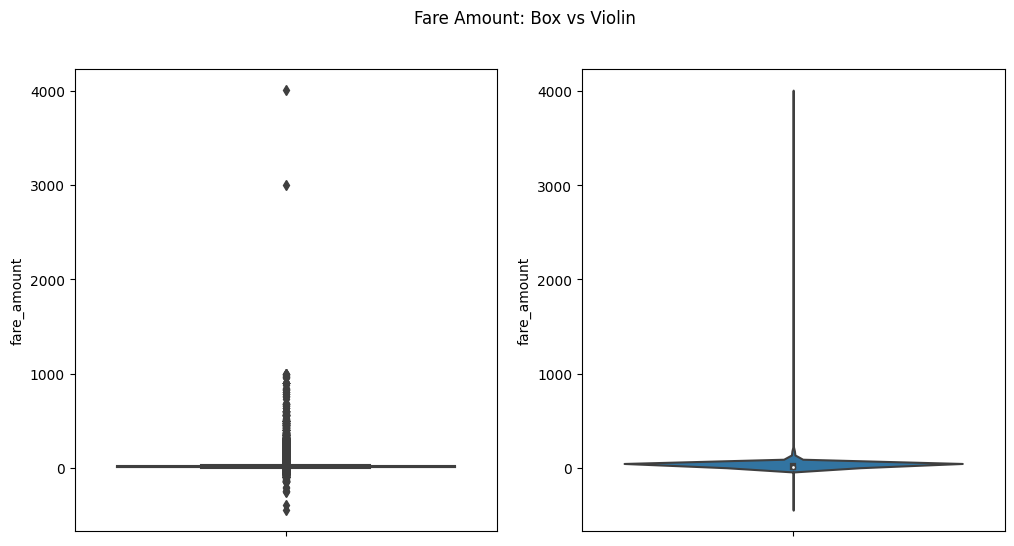

In [14]:
#box plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=df['fare_amount'], ax=ax[0])
sns.violinplot(y=df['fare_amount'], ax=ax[1])
plt.suptitle('Fare Amount: Box vs Violin')
plt.show()


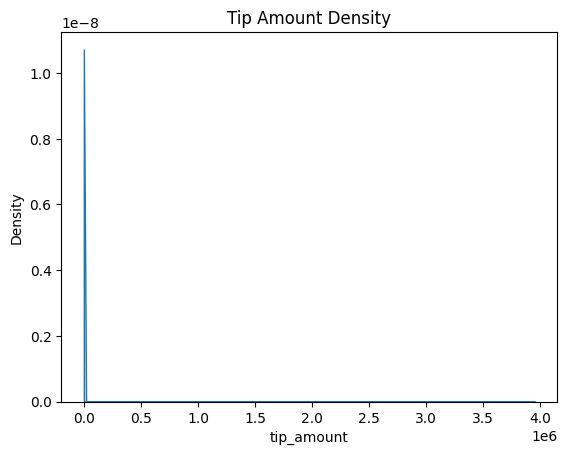

In [15]:
#density plot
sns.kdeplot(df['tip_amount'], shade=True)
plt.title('Tip Amount Density')
plt.show()

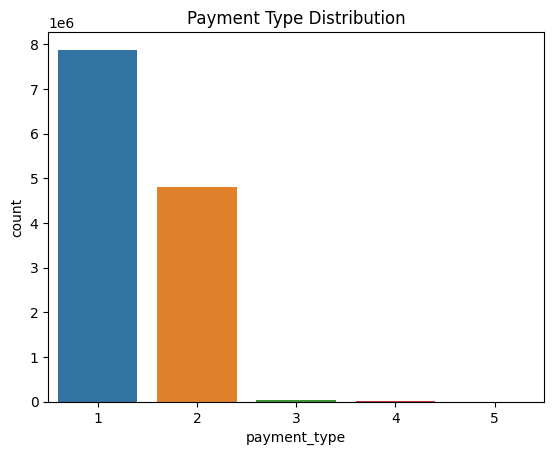

In [16]:
#bar chart
sns.countplot(x='payment_type', data=df)
plt.title('Payment Type Distribution')
plt.show()

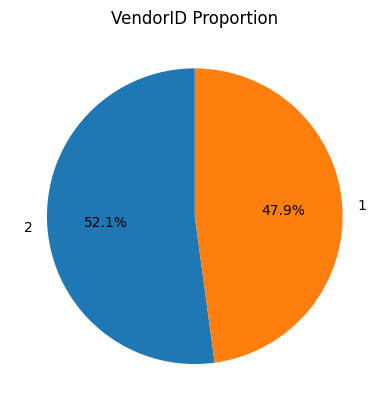

In [17]:
#pie chart
df['VendorID'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('VendorID Proportion')
plt.ylabel('')
plt.show()

3) CORRELATION ANALYSIS

In [18]:
# Trip Distance vs Fare Amount
pearson_corr1 = df[['trip_distance', 'fare_amount']].corr(method='pearson')
print("Trip Distance vs Fare Amount:\n", pearson_corr1)

Trip Distance vs Fare Amount:
                trip_distance  fare_amount
trip_distance       1.000000     0.000442
fare_amount         0.000442     1.000000


In [19]:
# Fare_amount vs Tip_amount
pearson_corr2 = df[['fare_amount', 'tip_amount']].corr(method='pearson')
print("Fare Amount vs Tip Amount:\n", pearson_corr2)

Fare Amount vs Tip Amount:
              fare_amount  tip_amount
fare_amount     1.000000    0.001398
tip_amount      0.001398    1.000000


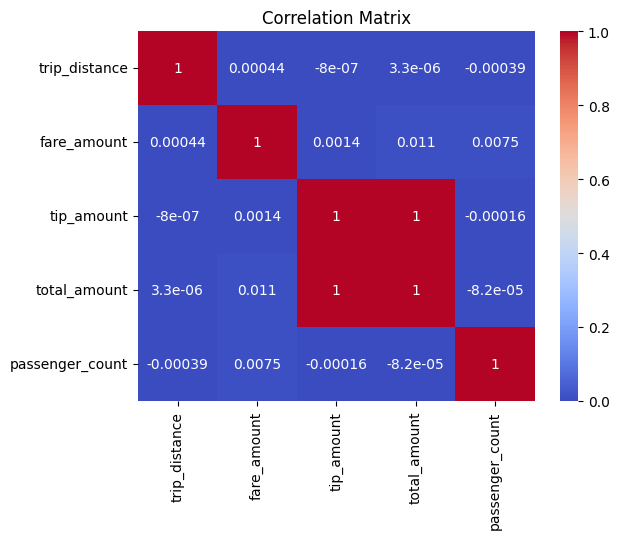

In [20]:
# Correlation HeatMap
selected = df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'passenger_count']]
sns.heatmap(selected.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

BONUS TASKS

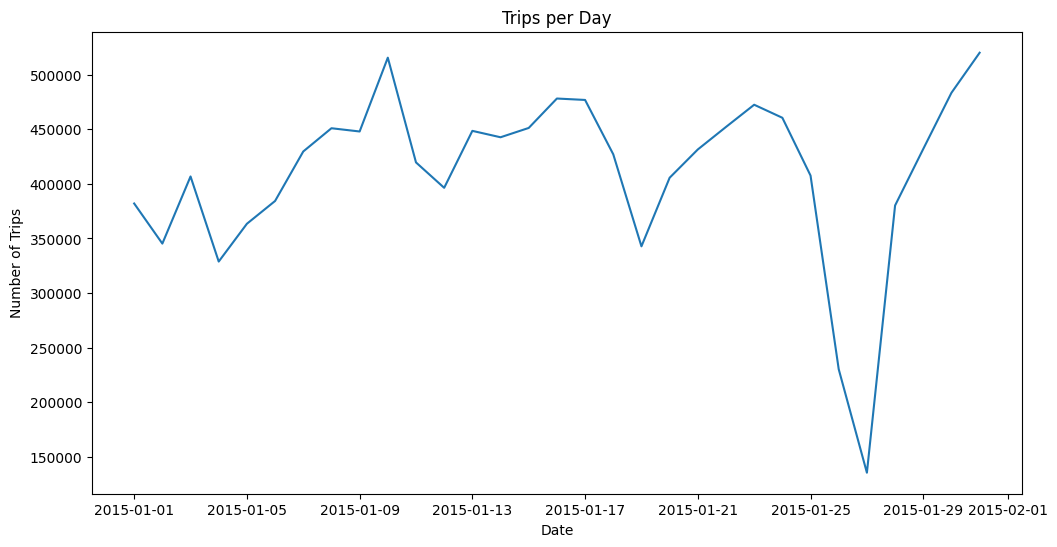

In [21]:
# Time Series Plot: Trips per day/hour
df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])  # adjust column name
df['pickup_date'] = df['pickup_datetime'].dt.date
trip_count = df.groupby('pickup_date').size()
trip_count.plot(figsize=(12, 6))
plt.title('Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()

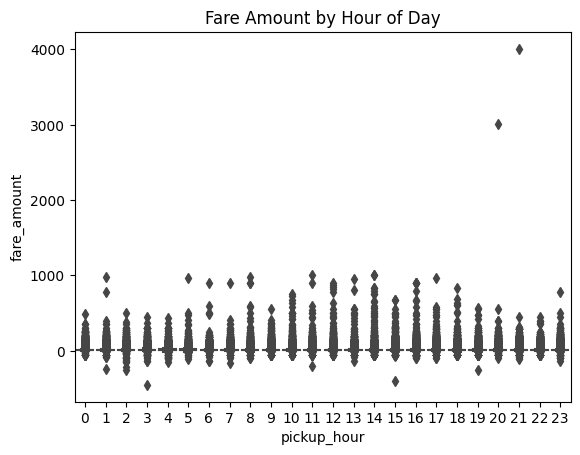

In [22]:
# Fare Amount vs Time of Day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
sns.boxplot(x='pickup_hour', y='fare_amount', data=df)
plt.title('Fare Amount by Hour of Day')
plt.show()